In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce Customers to Ecommerce Customers (1)


In [29]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**For making ROC curve we change value of target into binary form through median**

In [30]:
median_values = df['Yearly Amount Spent'].median()
median_values

498.887875469115

In [31]:
df["High_Spender_in_year"] = (df["Yearly Amount Spent"] >= median_values).astype(int)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,High_Spender_in_year
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,1
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,0
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,0
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,1
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,1


**Now ROC is possible Because 'Above median -> 1' and 'Below median -> 0'.**

> First select features(X) and Target (y)



In [32]:
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]].values
X

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [33]:
y = df["High_Spender_in_year"].values

**Split the data for train and testing**

> First get total number of samples

> then decide test size

> then suffle indices (this replaces random_state). Random order of rows

> After make random indices Split indices into train and test

> Then Create train and test sets











In [34]:
n_samples = X.shape[0]
n_samples

500

In [35]:
test_size = 0.2
n_test = int(n_samples * test_size)
print(n_test)
n_train = int(n_samples - n_test)
print(n_train)

100
400


In [36]:
np.random.seed(42) # same role as random_state
indices = np.arange(len(X))
np.random.shuffle(indices)
indices

array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450,   9, 194, 406,
        84, 371, 388, 495,  30, 316, 408, 490, 491, 280, 356,  76, 461,
       497, 211, 101, 334, 475, 336, 440, 173,   2, 333, 409,  70, 209,
        63, 384,  93, 485, 185,  33,  77,   0,  11, 415,  22,  72, 182,
       131, 410, 193,  55, 148,  18, 204,  78, 494, 262, 323, 483,  79,
        39, 451,  46, 238, 391, 352, 341, 277, 290, 317, 304, 268,  69,
       455, 465, 154,  82, 477, 172, 321,  90, 180, 414, 312, 278, 381,
       472, 362, 324, 431, 347,  86,  75, 438,  15, 249, 433,  19, 322,
       332,  56, 301, 229, 331, 132, 137, 423, 335,  25, 464, 281, 247,
       237, 117,  42, 220, 176, 320, 153, 231, 227, 417, 203, 126, 329,
        31, 113, 470, 271, 140,  57, 192,  24,  17, 265,  66, 208, 479,
        94, 253, 266,  23, 222, 261, 426,   5, 116,  45,  16, 462, 357,
         3, 218, 405,  60, 110, 318, 428,  29, 437, 471,  26,   7, 453,
       108,  37, 157, 489, 118, 114, 175, 373, 181, 144, 369, 39

In [37]:
test_indices = indices[:n_test]
train_indices = indices[:n_train]

In [38]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400,)
(100, 4)
(100,)


**Normalize features** very important for ROC curve

In [40]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# **Build Logistic Regression from scratch**

> *Sigmoid function*

> *Gradient Descent(Model Training)*








**Create a function named Sigmoid that input any real number(z)**

*   (z) = 1/(1 + e^(-z) -->> Mathematical formula

*   sigmoid converts any number -> between 0 & 1

*   The number becomes a probability ( This is why ROC is possible )






In [41]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

**Logistic Regression converts input features into a probability between 0 and 1**

In [42]:
def train_logistic(X,y, lr=0.01, epochs=1000):
  w = np.zeros(X.shape[1])
  b = 0
  for epoch in range(epochs):
    linear = np.dot(X,w) + b
    y_pred = sigmoid(linear)

    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.sum(y_pred - y) / len(y)

    w -= lr * dw
    b -= lr * db

  return w,b

**Training Functions**

*   X      -> features
*   y      -> true labels ( 0 or 1 )
*   lr     -> learning rate (step size)
*   epochs -> number of repetitions
*   w      -> initialize weights (one weight per feature)
*   X has 4 features -> w = [0,0,0,0]
*   b      = 0 ( bias starts at 0 ) . Shifts decision boundary   



---


**Gradient descent LOOP (for epoch in range(epochs):) -->>  used - For Train model again and again , Each loop = one improvement step**

*   Linear(hypothesis'H@X+b') = np.dot(X,w)+b -->>  Combine features with weights. Like maths (Z = Xw+b)
*   DW = Measure how wrong the model is . Find how much each weight contributed to the error.( Comes from the derivative of log loss function )
*  DB = Bias error , Average prediction mistake
*  Then Update parameters

> w -= lr*db (Move weights in opposite direction of error and Learning rate controls step size)

> b -= lr*db (Update bias the same way)
* Then return learned values











# **Train the model**

In [43]:
w,b = train_logistic(X_train,y_train)

**Get probabilities needed for ROC**

In [44]:
y_prob = sigmoid(np.dot(X_test,w) + b)

**ROC never uses predicted labels, only probabilities**

# **Now Compute ROC points (TPR & FPR)**

In [45]:
def roc_curve(y_true, y_prob, thresholds):
  tpr_list = []
  fpr_list = []

  for t in thresholds:
    y_pred = (y_prob >= t).astype(int)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    tpr_list.append(tpr)
    fpr_list.append(fpr)

  return tpr_list, fpr_list

**Generate Thresholds**

In [46]:
thresholds = np.linspace(0,1,100)
fpr,tpr = roc_curve(y_test,y_prob,thresholds)

# **Finally just plot the ROC curve**

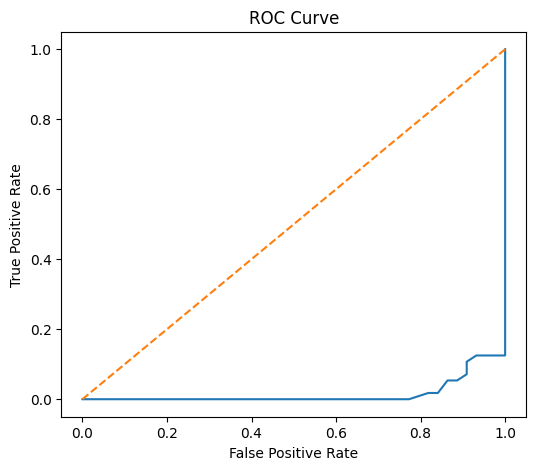

In [47]:
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
ls

'Ecommerce Customers'  'Ecommerce Customers (1)'   sample_data/


In [47]:
l